### Autor(es): Andrei Silva Santos e Laverty Diderone de Assis Ladeia
Programa de Pós-Graduação em Modelagem Computacional</br></br>
Disciplina: Métodos Numéricos</br></br>
Turma: 2024.1</br></br>
Plataforma:</br></br>
- CPU: 12th Gen Intel(R) Core(TM) i5-12500H, 16 núcleos 4.5 GHz
- Memory: 8GiB 4800 MT/s
- Swap: 16GiB
- GPU: GeForce RTX 3050
- SO: Ubuntu 22.04
- Python 3.1erro_aceitavel2
- Driver Version: 550.54.14
- CUDA Version: 12.4

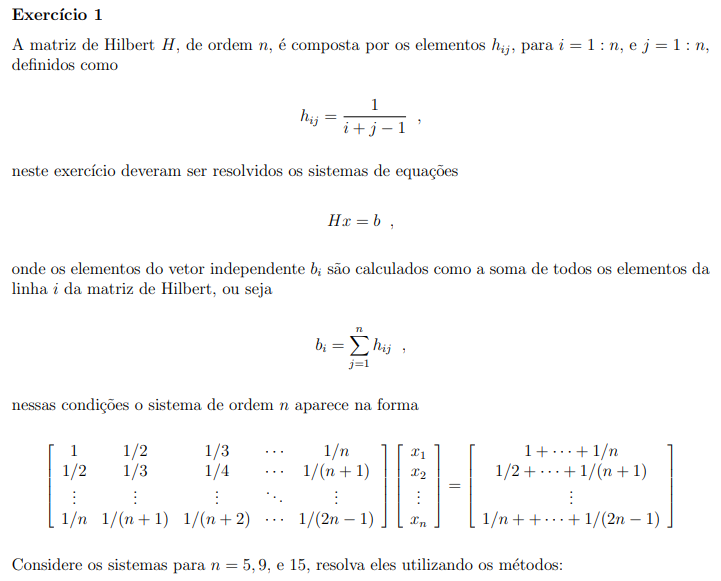

In [255]:
import numpy as np 
import matplotlib.pyplot as plt

def matriz_hilbert(n):
    matrizH = np.zeros((n, n))
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            matrizH[i-1, j-1] = 1 / (i + j - 1)
    return matrizH

def print_matriz(matriz):
    for row in matriz:
        print("|", end=" ")
        for elem in row:
            print("{:.4f}".format(elem), end=" ")
        print("|")

n = [5, 9, 15]
matrizes = [matriz_hilbert(i) for i in n]

for i in range(0, len(matrizes)):
    print("Matriz de Hilbert de Ordem", n[i], ":\n")
    print_matriz(matrizes[i])
    print("\n")

matriz_teste = [[3, -0.1, -0.2, 7.85],
                [0.1, 7, -0.3, -19.3],
                [0.3, 0.2, 10, 71.4]]

vetor_solucao_teste = [3, -2.5, 7]

Matriz de Hilbert de Ordem 5 :

| 1.0000 0.5000 0.3333 0.2500 0.2000 |
| 0.5000 0.3333 0.2500 0.2000 0.1667 |
| 0.3333 0.2500 0.2000 0.1667 0.1429 |
| 0.2500 0.2000 0.1667 0.1429 0.1250 |
| 0.2000 0.1667 0.1429 0.1250 0.1111 |


Matriz de Hilbert de Ordem 9 :

| 1.0000 0.5000 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 |
| 0.5000 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 |
| 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 |
| 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 |
| 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 |
| 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 0.0714 |
| 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 0.0714 0.0667 |
| 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 |
| 0.1111 0.1000 0.0909 0.0833 0.0769 0.0714 0.0667 0.0625 0.0588 |


Matriz de Hilbert de Ordem 15 :

| 1.0000 0.5000 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 0.0714 0

#### a) Eliminação de Gauss com substituição regressiva

In [265]:
# Matriz [n, -1] é igual o vetor de incognitas
# Vetor solucao é instanciado com o número de linhas da matriz

def eliminacao_Gauss_SR(matriz):
    n = len(matriz)

    # Eliminação de Gauss
    for k in range(n-1):
        for i in range(k + 1, n):
            fator = matriz[i][k] / matriz[k][k]
            for j in range(k + 1, n):
                matriz[i][j] -= fator * matriz[k][j]
            matriz[i][n] -= fator * matriz[k][n]

    # Substituição Regressiva
    vetor_solucao = np.zeros(n)
    vetor_solucao[n-1] = matriz[n-1][n] / matriz[n-1][n-1]
    for i in range(n - 2, -1, -1):
        soma = matriz[i][n]
        for j in range(i + 1, n):
            soma -= matriz[i][j] * vetor_solucao[j]
        vetor_solucao[i] = soma / matriz[i][i]

    return vetor_solucao

for i in range(0, len(matrizes)):
    matriz_original = matrizes[i]
    soma_linhas = np.sum(matriz_original, axis=1)
    matriz_aumentada = np.column_stack((matriz_original, soma_linhas))

    print(f"\nMatriz Aumentada com n={len(matrizes[i])}:")
    print_matriz(matriz_aumentada)

    print("\nVetor Solução: ", eliminacao_Gauss_SR(matriz_aumentada))

    print("\nMatriz Resultante:")
    print_matriz(matriz_aumentada)



Matriz Aumentada com n=5:
| 1.0000 0.5000 0.3333 0.2500 0.2000 2.2833 |
| 0.5000 0.3333 0.2500 0.2000 0.1667 1.4500 |
| 0.3333 0.2500 0.2000 0.1667 0.1429 1.0929 |
| 0.2500 0.2000 0.1667 0.1429 0.1250 0.8845 |
| 0.2000 0.1667 0.1429 0.1250 0.1111 0.7456 |

Vetor Solução:  [1. 1. 1. 1. 1.]

Matriz Resultante:
| 1.0000 0.5000 0.3333 0.2500 0.2000 2.2833 |
| 0.5000 0.0833 0.0833 0.0750 0.0667 0.3083 |
| 0.3333 0.0833 0.0056 0.0083 0.0095 0.0234 |
| 0.2500 0.0750 0.0083 0.0004 0.0007 0.0011 |
| 0.2000 0.0667 0.0095 0.0007 0.0000 0.0000 |

Matriz Aumentada com n=9:
| 1.0000 0.5000 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 2.8290 |
| 0.5000 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 1.9290 |
| 0.3333 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 1.5199 |
| 0.2500 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 1.2699 |
| 0.2000 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 1.0968 |
| 0.1667 0.1429 0.1250 0.1111 0.1000 0.0909 0.0833 0.0769 0.07

#### b) Eliminação de Gauss com pivoteamento parcial

#### c) Eliminação de Gauss com pivoteamento parcial com escala

#### d) Eliminação de Gauss com pivoteamento total

####  e) Jacobi

#### f) Gauss-Seidel

#### g) Sobre-relaxamento

### Análise

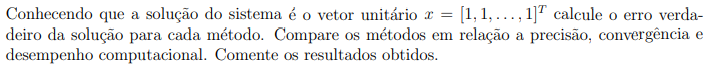

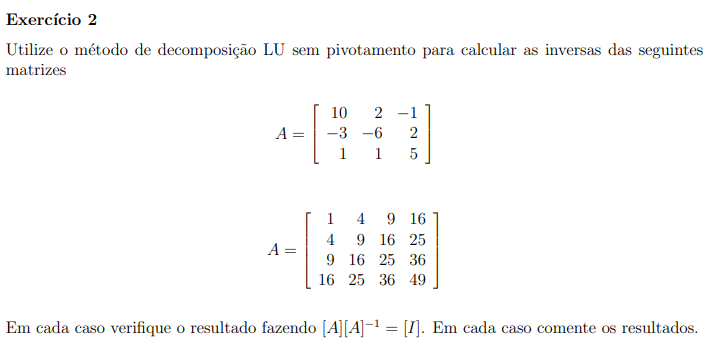